In [13]:
import pandas as pd
import matplotlib.pyplot as plt

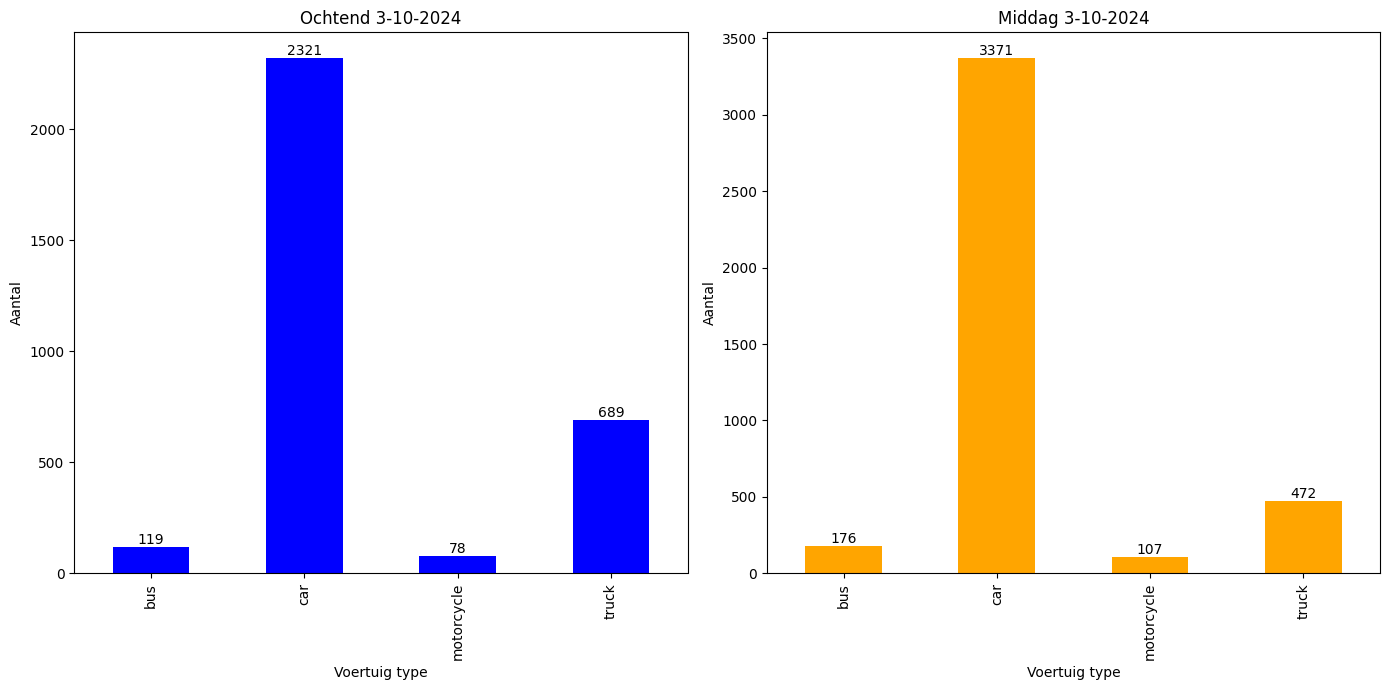

In [15]:
file_path = '/Users/vincent/Downloads/IFFDA bak/Automatic-License-Plate-Recognition-using-YOLOv8/output/3-10-2024-corresponding_licenceplates.csv'
data_compare = pd.read_csv(file_path)

file_path_counts = '/Users/vincent/Downloads/IFFDA bak/Automatic-License-Plate-Recognition-using-YOLOv8/output/3-10-2024-ochtend-counts-tweede-keer.csv'
data_counts_morning = pd.read_csv(file_path_counts)

file_path_counts = '/Users/vincent/Downloads/IFFDA bak/Automatic-License-Plate-Recognition-using-YOLOv8/output/3-10-2024-middag-counts-tweede-keer.csv'
data_counts_afternoon = pd.read_csv(file_path_counts)



# Ensure the data is in the same order
data_counts_morning = data_counts_morning.sort_values(by='Voertuig type').reset_index(drop=True)
data_counts_afternoon = data_counts_afternoon.sort_values(by='Voertuig type').reset_index(drop=True)

# Visualize and compare data_counts_morning and data_counts_afternoon
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Plot morning counts
data_counts_morning.plot(kind='bar', x='Voertuig type', y='Aantal', ax=ax[0], color='blue', legend=False)
ax[0].set_title('Ochtend 3-10-2024')
ax[0].set_ylabel('Aantal')

# Annotate morning counts
for i in ax[0].containers:
    ax[0].bar_label(i, label_type='edge')

# Plot afternoon counts
data_counts_afternoon.plot(kind='bar', x='Voertuig type', y='Aantal', ax=ax[1], color='orange', legend=False)
ax[1].set_title('Middag 3-10-2024')
ax[1].set_ylabel('Aantal')

# Annotate afternoon counts
for i in ax[1].containers:
    ax[1].bar_label(i, label_type='edge')

plt.tight_layout()
plt.show()


In [37]:
# Define the categories
categories = {
    'bus': 'Vrachtwagen/Zakelijk verkeer',
    'truck': 'Vrachtwagen/Zakelijk verkeer',
    'car': 'Doorgaande bezoekers',
    'motorcycle': 'Doorgaande bezoekers'
}

# Apply the categories to data
data_counts_morning['Categorie'] = data_counts_morning['Voertuig type'].map(categories)
data_counts_afternoon['Categorie'] = data_counts_afternoon['Voertuig type'].map(categories)

# Group by category
data_counts_morning_combined = data_counts_morning.groupby('Categorie').sum().reset_index()
data_counts_afternoon_combined = data_counts_afternoon.groupby('Categorie').sum().reset_index()

data_compare = pd.read_csv(file_path)

# Count the total number of commuting license plates
value_counts = data_compare['Kenteken'].value_counts()
total_commuting_count = value_counts.sum()

print(data_counts_morning_combined)
print(data_counts_afternoon_combined)
print(f'Totaal woon werk verkeer kentekens: {total_commuting_count}')

                      Categorie  Voertuig type  Aantal
0          Doorgaande bezoekers  carmotorcycle    2399
1  Vrachtwagen/Zakelijk verkeer       bustruck     808
                      Categorie  Voertuig type  Aantal
0          Doorgaande bezoekers  carmotorcycle    3478
1  Vrachtwagen/Zakelijk verkeer       bustruck     648
Totaal woon werk verkeer kentekens: 12


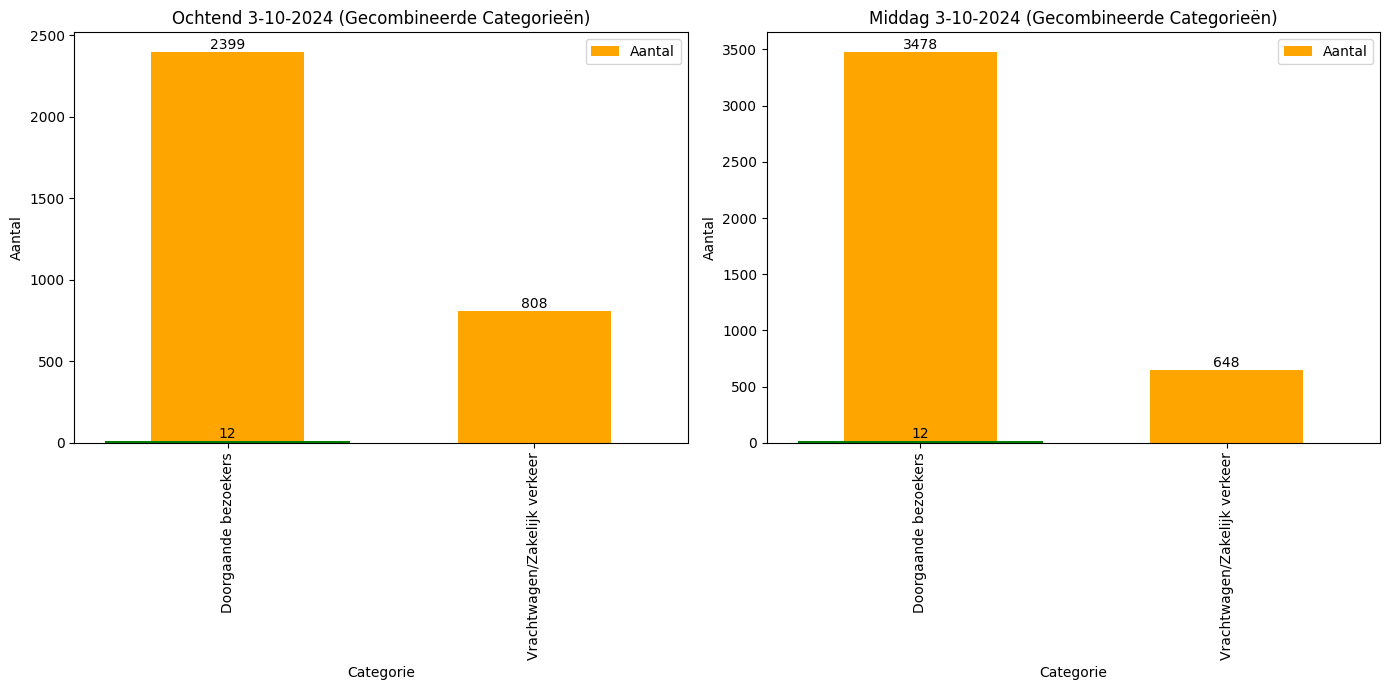

In [47]:
# Visualize the combined categories for morning and afternoon data
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Plot combined morning categories
data_counts_morning_combined.plot(kind='bar', x='Categorie', y='Aantal', ax=ax[0], color='orange', legend=True)
ax[0].set_title('Ochtend 3-10-2024 (Gecombineerde Categorieën)')
ax[0].set_ylabel('Aantal')

# Annotate combined morning categories
for i in ax[0].containers:
    ax[0].bar_label(i, label_type='edge')

# Add commuting count bar to morning plot
ax[0].bar('Woon-werk verkeer', total_commuting_count, color='green')
ax[0].text('Woon-werk verkeer', total_commuting_count, str(total_commuting_count), ha='center', va='bottom')

# Plot combined afternoon categories
data_counts_afternoon_combined.plot(kind='bar', x='Categorie', y='Aantal', ax=ax[1], color='orange', legend=True)
ax[1].set_title('Middag 3-10-2024 (Gecombineerde Categorieën)')
ax[1].set_ylabel('Aantal')

# Annotate combined afternoon categories
for i in ax[1].containers:
    ax[1].bar_label(i, label_type='edge')

# Add commuting count bar to afternoon plot
ax[1].bar('Woon-werk verkeer', total_commuting_count, color='green')
ax[1].text('Woon-werk verkeer', total_commuting_count, str(total_commuting_count), ha='center', va='bottom')

plt.tight_layout()
plt.show()